In [24]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [25]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

display(df.head())
print(df.info())
print("Missing values:\n", df.isnull().sum())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [26]:
# Features & target
X = df.iloc[:, :-1]
y = df['target']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Task 1 done ✅")


Task 1 done ✅


Linear Regression - MSE: 0.03711379440797688
Linear Regression - R² Score: 0.9468960016420045


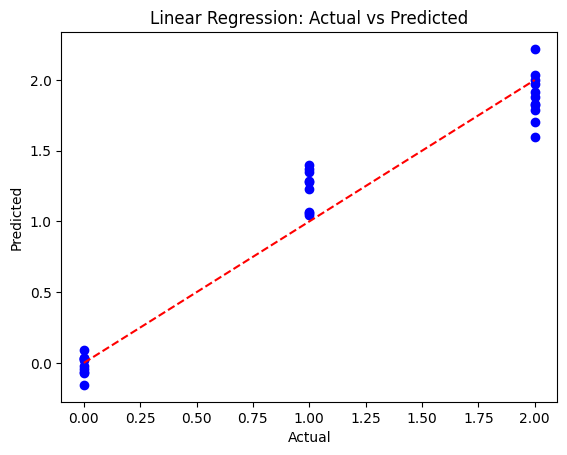

In [27]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression - MSE:", mse)
print("Linear Regression - R² Score:", r2)

# Optional plot
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


Classification Accuracy: 1.0
Precision: 1.0
Recall: 1.0


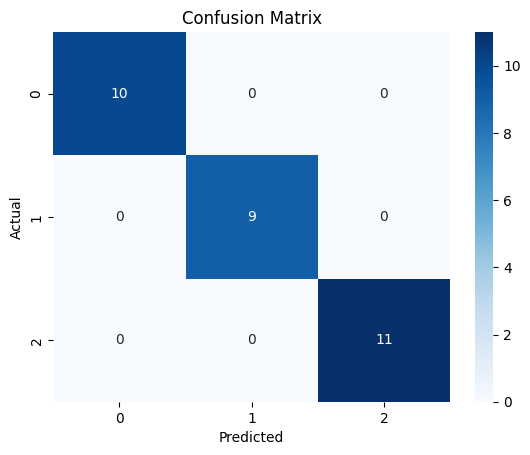


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred_class = clf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')

print("Classification Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


K-Means clustering done ✅


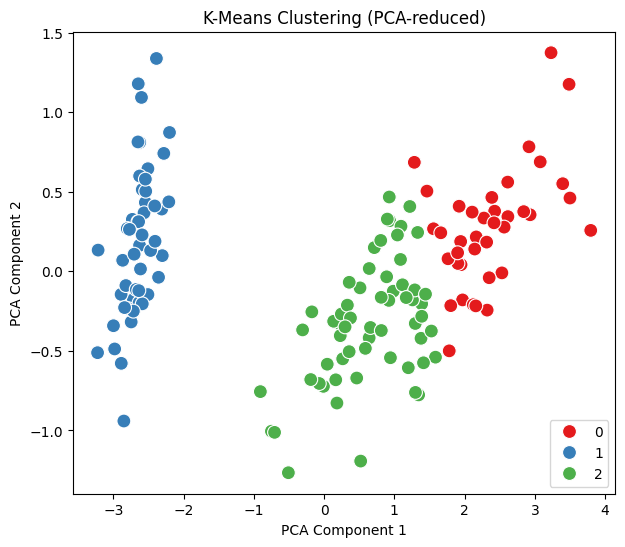

In [29]:
# Features for clustering
X_cluster = df.iloc[:, :-1].values

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_cluster)
print("K-Means clustering done ✅")

# Plot clusters
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1', s=100)
plt.title("K-Means Clustering (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Capstone Accuracy: 1.0


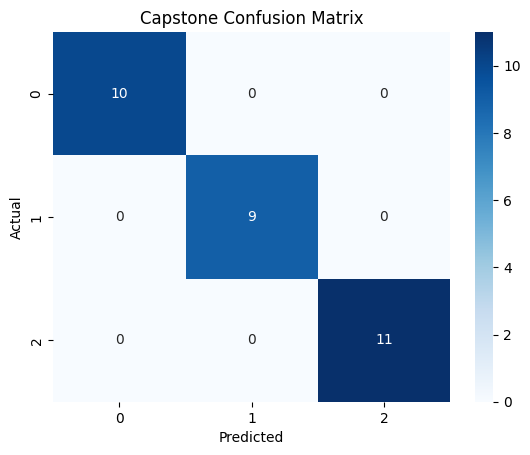

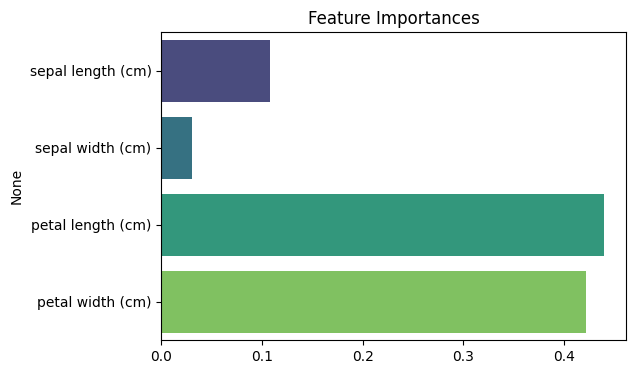

Capstone dataset saved ✅


In [30]:
# End-to-End ML Workflow: Random Forest on Iris
# Model already trained as clf

# Predictions
y_pred_capstone = clf.predict(X_test)

# Accuracy & Metrics
accuracy = accuracy_score(y_test, y_pred_capstone)
print("Capstone Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_capstone)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Capstone Confusion Matrix")
plt.show()

# Feature Importance (fixed for warnings)
importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names, dodge=False, palette='viridis')
plt.title("Feature Importances")
plt.show()

# Save preprocessed dataset
preprocessed_df = pd.DataFrame(X_scaled, columns=X.columns)
preprocessed_df['target'] = y.values
preprocessed_df.to_csv("iris_preprocessed_capstone.csv", index=False)
print("Capstone dataset saved ✅")
